# Random Forest Regressor-Medical Data Set
## Analysis Goals:
Predict the number of days a patient stays in the hospital ("initial_days") utilizing the gathered data. 

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [9]:
df= pd.read_csv('C:/Users/cynth/OneDrive/Documents/MS Data Analytics/Cleaned_Medical_Dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9120 entries, 0 to 9119
Data columns (total 50 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           9120 non-null   int64  
 1   Lat                                  9120 non-null   float64
 2   Lng                                  9120 non-null   float64
 3   Population                           9120 non-null   int64  
 4   Children                             9120 non-null   int64  
 5   Age                                  9120 non-null   int64  
 6   Income                               9120 non-null   float64
 7   ReAdmis                              9120 non-null   int64  
 8   VitD_levels                          9120 non-null   float64
 9   Doc_visits                           9120 non-null   int64  
 10  Full_meals_eaten                     9120 non-null   int64  
 11  vitD_supp                     

## Random Forest Regressor

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score

X = df.drop(['Initial_days'], axis=1)
y = df['Initial_days']

In [11]:
#Split the data into training and test data sets.
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state= 42)
X_train.to_csv("D209Task2_X_train.csv")
X_test.to_csv("D209Task2_X_test.csv")
y_train.to_csv("D209Task2_y_train.csv")
y_test.to_csv("D209Task2_y_test.csv")

In [12]:
#instantiate Random Forest Regressor
rf = RandomForestRegressor(max_depth = 6)
#train the model
rf.fit(X_train, y_train)
#predict labels for X_test
cv=cross_val_score(rf,X_train, y_train,scoring='r2',  cv=5 )
cv_mean = np.mean(cv)
cv_test=cross_val_score(rf,X_test, y_test,scoring='r2',  cv=5 )
cv_test_mean = np.mean(cv_test)
y_pred=rf.predict(X_test)
# Evaluate
mse = MSE(y_test, y_pred)
rmse=(mse**(1/2))
print('Test set MSE of rf: {:.4f}'.format(mse))
print('Test set RMSE of rf: {:.4f}'.format(rmse))
print( 'Cross Val Score R2 for train data: {:.4f}'.format(cv_mean))
print( 'Cross Val Score R2 for test data: {:.4f}'.format(cv_test_mean))
print('rf train score: ', rf.score(X_train, y_train))
print('rf test score', rf.score(X_test, y_test))

Test set MSE of rf: 4.6822
Test set RMSE of rf: 2.1639
Cross Val Score R2 for train data: 0.9928
Cross Val Score R2 for test data: 0.9926
rf train score:  0.9936514742989756
rf test score 0.9931976076328076


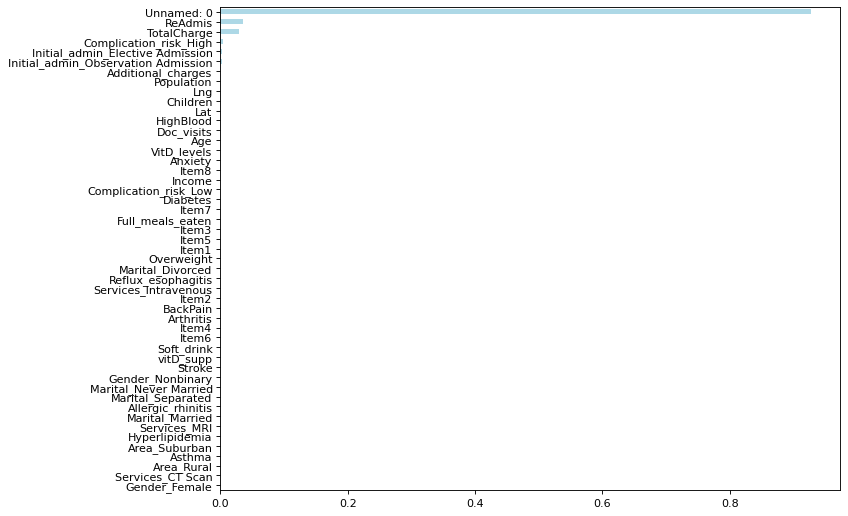

In [13]:
#feature importance for rf tree
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(10, 8), dpi=80)
#create a pd.series of feature importance
importances_rf = pd.Series(rf.feature_importances_, index=X.columns)
# sort importances_rf =
sorted_importances_rf =importances_rf.sort_values()
#make horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='lightblue')

plt.show()

<AxesSubplot:xlabel='TotalCharge', ylabel='Initial_days'>

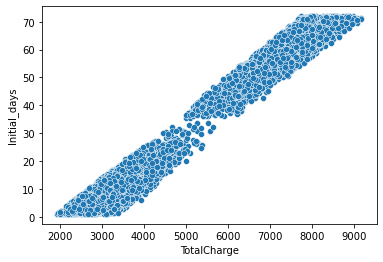

In [14]:
sns.scatterplot(x=df.TotalCharge, y=df.Initial_days)

## Data Summary and Implications



#### 1.  Acccuracy and the mean squared error (MSE) of the prediction model.
The following metrics were calculated for this random forest classifier. As shown below, the MSE is 4.9706, the R2 of both the training and test data was 0.99, and the scores for the random forest model are also 0.99. This all seems to indicate that this model does a good job of predicting inital_days. 

    Test set MSE of rf: 4.9706
    Test set RMSE of rf: 2.2295
    Cross Val Score R2 for train data: 0.9928
    Cross Val Score R2 for test data: 0.9926
    rf train score:  0.9935368952029457
    rf test score 0.9927787420296704

#### 2.  Implications of the prediction analysis.
The MSE, RMSE, R2, and model score seem to indicate that the random forest regressor is highly accurate and can be used to help predict the initial days in a visit. 

#### 3.  Limitations of the data analysis.
One limitation of my analysis is that I did not utilize a grid search to tune the hyperparameters for my random forest regressor and I used the default number of regression trees. Its possible that tuning these hyperparameters and increading the number of trees could make the model better, but since it is already so accurate, it probably wouldn't make much of a differnce in terms of helping the client predict initial days.
#### 4.  Recommended course of action
As noted in the feature importance plot, one variable , total charge,  is almost a perfect fit for initial days. My next steps would be to remove this variable to compare the accuracy and then check in with the client to hear their thoughts. Otherwise,  would Since the random forest regressor seems to be highly accurate, I would suggest that the organization can proceed and continue to run the model to predict new data. If the accuracy of the model drops significantly then we could re-train the data and experiment with voting classifiers or decision trees with bootsting. 